当学习新的pytorch使用方法时，在这里添加

# itertools
一个高效的迭代器，还记得yield的迭代生成功能吧？itertools提供了更加丰富灵活的序列产生方式

In [18]:
from itertools import count
print("===数字产生器===")
generator = count(2)
for i in range(10):
    print(next(generator))

generator = count(5, 2)
for i in range(10):
    print(next(generator))
    
from itertools import cycle
print("===字母循环产生器===")
generator = cycle("abc")
for i in range(10):
    print(next(generator))

from itertools import repeat
print("===无穷循环===")
generator = repeat("i")
for i in range(10):
    print(next(generator))


===数字产生器===
2
3
4
5
6
7
8
9
10
11
5
7
9
11
13
15
17
19
21
23
===字母循环产生器===
a
b
c
a
b
c
a
b
c
a
===无穷循环===
i
i
i
i
i
i
i
i
i
i


当然也有有限迭代器

In [17]:
from itertools import accumulate
for i in accumulate([1, 2, 3, 4]):
    print(i)
    
from itertools import chain
for i in chain([1, 2, 3], [2, 3, 4]):
    print(i)
    
for i in chain("abc", "ABC"):
    print(i)

1
3
6
10
1
2
3
2
3
4
a
b
c
A
B
C


# pytorch基础
我们将练习，可以用于GPU训练的最基础类：标量Tensor

In [25]:
import torch
x = torch.Tensor(5, 5) # 未初始化
print(x)
y = torch.rand(5, 5) # 随机初始化
print(y)
x.size() # 获取shape


 0.0000e+00 -8.5899e+09  0.0000e+00 -8.5899e+09  1.1210e-44
 0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
 0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
 0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
 0.0000e+00 -8.5899e+09  0.0000e+00 -8.5899e+09  4.2039e-45
[torch.FloatTensor of size 5x5]


 0.9451  0.9439  0.8820  0.0143  0.0351
 0.0037  0.8230  0.0785  0.9323  0.8221
 0.1489  0.5827  0.6032  0.0532  0.3729
 0.2564  0.6914  0.3004  0.6219  0.8102
 0.1808  0.9670  0.3201  0.1664  0.4150
[torch.FloatTensor of size 5x5]



torch.Size([5, 5])

OK，简单的Tensor加法操作

In [36]:
print(x + y)
z = torch.rand(5, 5)
print(x + y + z)
# error: print(torch.add(x, y, z))



 9.4512e-01 -8.5899e+09  8.8197e-01 -8.5899e+09  3.5128e-02
 3.7267e-03  8.2298e-01  7.8545e-02  9.3233e-01  8.2209e-01
 1.4892e-01  5.8272e-01  6.0317e-01  5.3193e-02  3.7286e-01
 2.5644e-01  6.9143e-01  3.0036e-01  6.2186e-01  8.1016e-01
 1.8077e-01 -8.5899e+09  3.2008e-01 -8.5899e+09  4.1501e-01
[torch.FloatTensor of size 5x5]


 1.8345e+00 -8.5899e+09  1.2501e+00 -8.5899e+09  8.4351e-01
 8.9268e-01  1.7973e+00  9.2037e-01  1.1638e+00  1.0744e+00
 4.8442e-01  1.0974e+00  1.2266e+00  2.4995e-01  3.8067e-01
 4.9555e-01  9.4416e-01  5.4582e-01  1.2454e+00  1.2449e+00
 4.4154e-01 -8.5899e+09  1.0567e+00 -8.5899e+09  6.5854e-01
[torch.FloatTensor of size 5x5]



In [39]:
#原位替换
z1 = z
z2 = z
z3 = z
z1 = z1 + x # => z = z + x
print(z1)
z2 = z2 + x
print(z2)

z3.add_(x)
print(z3)
z2 = z2 + x
print(z2)


 8.8940e-01 -8.5899e+09  3.6810e-01 -8.5899e+09  8.0838e-01
 8.8895e-01  9.7430e-01  8.4183e-01  2.3148e-01  2.5230e-01
 3.3550e-01  5.1464e-01  6.2347e-01  1.9675e-01  7.8019e-03
 2.3910e-01  2.5273e-01  2.4546e-01  6.2359e-01  4.3478e-01
 2.6077e-01 -8.5899e+09  7.3657e-01 -8.5899e+09  2.4353e-01
[torch.FloatTensor of size 5x5]


 8.8940e-01 -8.5899e+09  3.6810e-01 -8.5899e+09  8.0838e-01
 8.8895e-01  9.7430e-01  8.4183e-01  2.3148e-01  2.5230e-01
 3.3550e-01  5.1464e-01  6.2347e-01  1.9675e-01  7.8019e-03
 2.3910e-01  2.5273e-01  2.4546e-01  6.2359e-01  4.3478e-01
 2.6077e-01 -8.5899e+09  7.3657e-01 -8.5899e+09  2.4353e-01
[torch.FloatTensor of size 5x5]


 8.8940e-01 -8.5899e+09  3.6810e-01 -8.5899e+09  8.0838e-01
 8.8895e-01  9.7430e-01  8.4183e-01  2.3148e-01  2.5230e-01
 3.3550e-01  5.1464e-01  6.2347e-01  1.9675e-01  7.8019e-03
 2.3910e-01  2.5273e-01  2.4546e-01  6.2359e-01  4.3478e-01
 2.6077e-01 -8.5899e+09  7.3657e-01 -8.5899e+09  2.4353e-01
[torch.FloatTensor of size 5x5]

你会发现，z1和z2加完后不相等，这因为z1和z2只是引用赋值，没有进行clone，所以z3调用add_时，对z的原值进行了修改
z1没有影响z2是因为z1 + x 创造了新的Tensor，所以没有影响z的原值

当然，torch拥有和numpy一样的多维数组索引提取技术

In [43]:
print(x[2:4, 1:3])


 0  0
 0  0
[torch.FloatTensor of size 2x2]



In [44]:
# 从numpy转换过来
import numpy
a = numpy.asarray([1, 3])
print(torch.from_numpy(a))



 1
 3
[torch.LongTensor of size 2]



大量的操作方法，参考 [doc](http://pytorch.org/docs/master/torch.html)

还有矩阵操作 sum, mean, std, max, min

torch比较二逼的地方是为了灵活，把cuda暴露出来了

In [46]:
if torch.cuda.is_available():
    x = x.cuda()
    y = y.cuda()
    x + y

# 自动梯度计算 autograd
autograd包，Variable也在这个里面是整个包的核心

Variable其实一个管理类，首先他的核心是一个标量Tensor，叫data，同时为它配备了一个反向传播时需要的梯度记录，叫grad。
Function是autograd包中另一个非常重要的类。比如grad的计算就需要一个Function叫grad_fn，grad_fn记录了变量的创建过程，这样，未来反向传播时就会对grad_fn进行求导，所以这里要吐槽的是，grad_fn这个名字起得太恶心，叫forward_fn更好一些。

In [62]:
from torch import autograd
from torch.autograd import Variable
input = Variable(torch.ones(5, 5), requires_grad = True)
print(input)
d = torch.ones(5, 5)
# ERROR: print(input + d)
print(input + Variable(d))
y = input + 4
print(y)
print(y * y)

Variable containing:
 1  1  1  1  1
 1  1  1  1  1
 1  1  1  1  1
 1  1  1  1  1
 1  1  1  1  1
[torch.FloatTensor of size 5x5]

Variable containing:
 2  2  2  2  2
 2  2  2  2  2
 2  2  2  2  2
 2  2  2  2  2
 2  2  2  2  2
[torch.FloatTensor of size 5x5]

Variable containing:
 5  5  5  5  5
 5  5  5  5  5
 5  5  5  5  5
 5  5  5  5  5
 5  5  5  5  5
[torch.FloatTensor of size 5x5]

Variable containing:
 25  25  25  25  25
 25  25  25  25  25
 25  25  25  25  25
 25  25  25  25  25
 25  25  25  25  25
[torch.FloatTensor of size 5x5]



操作只能在Variable之间进行

In [61]:
print(input.grad_fn)
print(y.grad_fn)

None


y有grad_fn，input没有，grad_fn代表变量的创建过程
好，下面我们来求一下梯度咯

In [66]:
z = y * y * 3
out = z.mean()
print(z, out)
out.backward() # 反向求导
print(out.grad) # 查看求导结果
print(z.grad)
print(y.grad)
print(input.grad)

Variable containing:
 75  75  75  75  75
 75  75  75  75  75
 75  75  75  75  75
 75  75  75  75  75
 75  75  75  75  75
[torch.FloatTensor of size 5x5]
 Variable containing:
 75
[torch.FloatTensor of size 1]

None
None
None
Variable containing:
 3.6000  3.6000  3.6000  3.6000  3.6000
 3.6000  3.6000  3.6000  3.6000  3.6000
 3.6000  3.6000  3.6000  3.6000  3.6000
 3.6000  3.6000  3.6000  3.6000  3.6000
 3.6000  3.6000  3.6000  3.6000  3.6000
[torch.FloatTensor of size 5x5]



由于y, z都没有requires_grad = True，所以导致没有grad

In [67]:
help(y.backward)

Help on method backward in module torch.autograd.variable:

backward(gradient=None, retain_graph=None, create_graph=None, retain_variables=None) method of torch.autograd.variable.Variable instance
    Computes the gradient of current variable w.r.t. graph leaves.
    
    The graph is differentiated using the chain rule. If the variable is
    non-scalar (i.e. its data has more than one element) and requires
    gradient, the function additionaly requires specifying ``gradient``.
    It should be a tensor of matching type and location, that contains
    the gradient of the differentiated function w.r.t. ``self``.
    
    This function accumulates gradients in the leaves - you might need to
    zero them before calling it.
    
    Arguments:
        grad_variables (Tensor, Variable or None): Gradient w.r.t. the
            variable. If it is a tensor, it will be automatically converted
            to a Variable that is volatile unless ``create_graph`` is True.
            None values 

那么我们也可以自定一个Function，那么就要提供forward和backward两个方法啦

In [68]:
from torch.autograd import Function
def Exp(Function):
    @staticmethod
    def forward(ctx, i):
        result = i.exp()
        ctx.save_for_forward(result)
    
    @staticmethod
    def backward(ctx, grad_output):
        result, = ctx.saved_variables
        return grad_output * result
    

OK, 我们大概了解了自动梯度相关的知识，下面就推进开始学习最喜欢的神经网络吧，别忘了nn的基础是autograd哦

## 神经网络 torch.nn
前馈神经网络FNN，是一个多层感知器网络MLP，对于有监督学习，我们一般讲损失函数定义在最后的输出层上，对于多分类问题，可以使用softmaxwithcrossentropy作为损失函数。

整个训练的过程大致是这样的：
- 初始化网络参数
- 将训练数据分批次
- 对于每个批次的输入
    - 先进行前向传播，中间的激活层一般都要记下来，一直到输出层
    - 计算输出层的误差，记录最后一层每个神经元的delta
    - 将误差进行反向传播，从倒数第二层开始，计算各层的delta，进而依赖delta计算该层的grad
- 均化该批次的grad
- 更新整个网络的权重

weight = weight - learning_rate * gradient

下面先来一个复杂的

In [85]:
import torch.nn as nn
import torch.nn.functional as F # 一个函数包，里面有一些工具函数
from torch.autograd import Variable
import torch

class Net(nn.Module): # TODOModule的概念
    def __init__(self):
        super(Net, self).__init__()
        
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # 一个输入频道，6个feature， 5x5的卷积核
        self.conv1 = nn.Conv2d(1, 6, 5) # conv1其实可以看成一个函数，后面会当函数一样调用
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        # 线性变换，注意这些定义的顺序没有关系，现在还没有把这些层关联到一起，只是分别定义
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        # max pool 1
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2)) # 2x2的pooling
        x = F.max_pool2d(F.relu(self.conv2(x)), 2) # 没有异形尺寸，写一个2也可以
        x = x.view(-1, self.num_flat_features(x)) # TODO 这是个什么玩意？好像是个维度转换 flatten
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x) # 注意为了后面的softmax，这里要露出logits，不能加激活函数了
        return x
    
    # 正常不用写backward，因为人家会自动算滴 
    
    def num_flat_features(self, x):
        size = x.size()[1:] # 除了batch的索引之外的维度信息全部取出来, d1 * d2 * d3 * d4 ...
        num_features = 1
        for dim in size:
            num_features *= dim
        return num_features
    
net = Net()
print(net)

Net (
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)


In [81]:
params = list(net.parameters()) # 一个非常复杂的结构，每一个元素是一个Tensor，代表了相应结构的内部权重信息
print(len(params))
print(params[:2])
print(params[0].size())

10
[Parameter containing:
(0 ,0 ,.,.) = 
 -0.1042 -0.1793 -0.1388  0.1053  0.0884
  0.0719 -0.1042  0.0587 -0.0527  0.1563
  0.0940 -0.0827  0.0610  0.1233 -0.0583
 -0.1769 -0.0884 -0.1536  0.0332  0.0880
 -0.0986  0.1952 -0.0860 -0.0616  0.0521

(1 ,0 ,.,.) = 
 -0.1395  0.0351 -0.0007  0.0033 -0.0597
  0.1587 -0.1626 -0.0078 -0.0742  0.0679
 -0.0479  0.0209 -0.0968  0.0767 -0.1573
  0.0466  0.1651 -0.0915  0.1011 -0.1826
 -0.1994 -0.0369 -0.0305 -0.1998 -0.0517

(2 ,0 ,.,.) = 
 -0.1137  0.1080  0.1185  0.0763 -0.0396
 -0.0560  0.1419  0.0876 -0.0083  0.1896
 -0.0410 -0.0134 -0.0269  0.1059 -0.1240
 -0.1557  0.1067 -0.0403  0.1092 -0.0554
 -0.1332 -0.1512 -0.1390  0.0155 -0.0458

(3 ,0 ,.,.) = 
 -0.1069 -0.1170  0.1542 -0.1885  0.1297
 -0.1433 -0.0722 -0.0406 -0.1468 -0.0461
  0.1035 -0.0822 -0.0678 -0.1886 -0.0446
  0.0443 -0.1143 -0.1898  0.0061  0.0060
  0.1407 -0.0075  0.0408  0.1999  0.1607

(4 ,0 ,.,.) = 
 -0.0320  0.0532  0.1038  0.0607 -0.0032
  0.1805  0.1050  0.1502 -0.1159 -

下面我们看看这个网络怎样制造输出吧

In [86]:
input = Variable(torch.randn(1, 1, 32, 32))
out = net(input)
print(out)

Variable containing:
 0.0582 -0.1069 -0.1225 -0.1314 -0.0049 -0.1201  0.0164  0.0125 -0.0239 -0.0368
[torch.FloatTensor of size 1x10]



OK, 进行一次反向传播前，记得归零grad

In [88]:
net.zero_grad()
out.backward(torch.randn(1, 10)) # 随便制造个误差好了

torch只支持minibatch模式，如果想单一sample训练，batch_size设置为1就好了，使用input.unsqueeze(0)就可以模拟成minibatch模式
nn.Module - 神经网络模块，其实就是神经网络的基类

In [90]:
output = net(input)
target = Variable(torch.arange(1, 11)) # 随便制造个目标值好了
criterion = nn.MSELoss() # 标准，生成一个MSE评价函数，均方差Mean Squared Error

MSE是个什么鬼呢？通常我们使用最小二乘法（Least Squared Method）进行模型训练的目的是寻找一条直线和他的待拟合样本之间的最小欧式距离。通过梯度下降我们可以去寻找这个最小点。LSM是一个寻找模型的最佳参数以匹配样本的方法。MSE是样本均方差，计算这个值，可以评价训练出来的模型的好坏。其实LSE这个方法就是用来最小化MSE的，只不过最小二乘的cost公式在课程中讲解时一般都没有开平方。到了torch这里，就干脆统一了，所以MSE既是criteron(评价函数)也是loss（损失函数）。

In [91]:
loss = criterion(output, target)
print(loss)

Variable containing:
 38.9388
[torch.FloatTensor of size 1]



In [93]:
loss.grad_fn

好，下面开始反向传播，记得先清零grad

In [94]:
net.zero_grad()
print("conv1.bias.grad before backward")
print(net.conv1.bias.grad)
loss.backward()
print("conv1.bias.grad.after backward")
print(net.conv1.bias.grad)

conv1.bias.grad before backward
Variable containing:
 0
 0
 0
 0
 0
 0
[torch.FloatTensor of size 6]

conv1.bias.grad.after backward
Variable containing:
 0.0210
 0.1442
-0.0624
 0.0069
-0.0628
-0.0490
[torch.FloatTensor of size 6]



看到没，grad算出来，突突就算出来了，多方便啊，但注意我们还没有update权重信息呢

In [95]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

这里，好好讲解一下，前面没好好学，这里就看不懂了，sub_原位替换，不用说了 f是每一层的参数，每层参数都是一个Variable，注意Variable里面有什么来着data,如果选了requires_grad = True还会有一个grad的内部Variable

这里f.data就是该层权重的数据，f.grad.data是该层计算出的梯度的数据

OK，还有一点要清楚，这只是进行了一次反向传播

前面这个梯度下降是我们自己写出来的，但单纯的梯度下降算法是不实际的，我们还有很多先进的梯度优化器，比如AdamOptimizer SGDOptimizer

In [99]:
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr = 0.01) # 要更新的所有参数信息都交给算法了，剩下的事情由算法自己解决
optimizer.zero_grad() # 等同于 net.zero_grad()
output = net(input) # 前向
loss = criterion(output, target) # 计算输出误差
loss.backward() # Variable的反向传播函数，基于grad_fn自动算
optimizer.step() # 更新梯度，厉害了吧，optimizer会特别随性的控制step，是迈大一点的步子，还是迈小一点的步子，以尽快寻找极值

Great, 我们完成了简单的网络搭建到网络训练过程，这里没有写minibatch的全过程，留作作业吧。

# 数据和一次更完整的训练
最佳的数据读取和利用过程是：load进来->归一化处理->载入nparray->转为Tensor->包装成Variable，注意网络的输入时Variable，这样方便统一处理，因为一个网络的输入可能是另一个网络的输出，如果输入输出不统一，这种组合就很麻烦。对于视觉问题，torch引入了torchvision包，提供便利的数据集和数据加载功能。这次我们使用torchvision引入CIFAR10数据集

![](./cifar10.png)

In [103]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([ transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) ]) #这是什么玩意儿

trainset = torchvision.datasets.CIFAR10(root='./data', train = True, download = True, transform = transform)
trainLoader = torch.utils.data.DataLoader(trainset, batch_size = 4, shuffle = True, num_workers = 2) # batch产生器

testset = torchvision.datasets.CIFAR10(root='./data', train = False, download = True, transform = transform)
testLoader = torch.utils.data.DataLoader(testset, batch_size = 4, shuffle = False, num_workers = 2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


torch.Size([4, 3, 32, 32])
Help on function make_grid in module torchvision.utils:

make_grid(tensor, nrow=8, padding=2, normalize=False, range=None, scale_each=False, pad_value=0)
    Make a grid of images.
    
    Args:
        tensor (Tensor or list): 4D mini-batch Tensor of shape (B x C x H x W)
            or a list of images all of the same size.
        nrows (int, optional): Number of rows in grid. Final grid size is
            (B / nrow, nrow). Default is 8.
        normalize (bool, optional): If True, shift the image to the range (0, 1),
            by subtracting the minimum and dividing by the maximum pixel value.
        range (tuple, optional): tuple (min, max) where min and max are numbers,
            then these numbers are used to normalize the image. By default, min and max
            are computed from the tensor.
        scale_each(bool, optional): If True, scale each image in the batch of
            images separately rather than the (min, max) over all images.
 

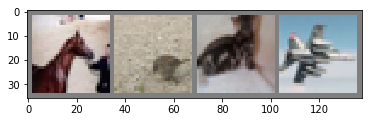

horse  bird   cat plane


In [125]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(imgs):
    print(imgs.size())
    print(imgs[0])
    imgs = imgs / 2 + 0.5 # unnormalize 反归一化，原值-1-1 =》 0-1
    npimgs = imgs.numpy()
    print(npimgs[0].shape)
    timg = np.transpose(npimgs, (1, 2, 0))
    print(timg.shape)
    plt.imshow(timg) # 转置
    plt.show()

dataiter = iter(trainLoader)
images, labels = dataiter.next()
print(images.size())
help(torchvision.utils.make_grid)
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))
    

这一段学习起来比较辛苦，make_grid基本没有人详细的解释他，下面就让我来给大家分析分析吧

首先，什么是grid，其实就是图片网格，image grid，一组图片展示序列
以上面的例子为例，输入是32x32的图片，做成网格后，加入padding，默认是2，所以高度变成了32 + 2*2 = 36, 我们有四张图片，所以宽度变成了4*32 + 5 * 2 = 138, 还有一个数是3，对于训练数据是放到前面的，但对于imshow需要放到后面，所以使用了transpose，OK，现在清楚了吧。不谢。

### transforms
接下来，我们回过头，啃前面那个更恶心的transforms
transform = transforms.Compose([ transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) ])
看着是不是想吐，什么东西？

In [127]:
help(transforms.Compose)

Help on class Compose in module torchvision.transforms:

class Compose(builtins.object)
 |  Composes several transforms together.
 |  
 |  Args:
 |      transforms (list of ``Transform`` objects): list of transforms to compose.
 |  
 |  Example:
 |      >>> transforms.Compose([
 |      >>>     transforms.CenterCrop(10),
 |      >>>     transforms.ToTensor(),
 |      >>> ])
 |  
 |  Methods defined here:
 |  
 |  __call__(self, img)
 |      Call self as a function.
 |  
 |  __init__(self, transforms)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



OK, easy, Compose原来是个组合器，应该是一个流水线，本例中，transforms.toTensor()获得转换成Tensor的转换器，transforms.Normalize我们来看看是一个什么归一化工具，主要是参数不明白，为什么俩参数

In [128]:
help(transforms.Normalize)

Help on class Normalize in module torchvision.transforms:

class Normalize(builtins.object)
 |  Normalize an tensor image with mean and standard deviation.
 |  
 |  Given mean: (R, G, B) and std: (R, G, B),
 |  will normalize each channel of the torch.*Tensor, i.e.
 |  channel = (channel - mean) / std
 |  
 |  Args:
 |      mean (sequence): Sequence of means for R, G, B channels respecitvely.
 |      std (sequence): Sequence of standard deviations for R, G, B channels
 |          respecitvely.
 |  
 |  Methods defined here:
 |  
 |  __call__(self, tensor)
 |      Args:
 |          tensor (Tensor): Tensor image of size (C, H, W) to be normalized.
 |      
 |      Returns:
 |          Tensor: Normalized image.
 |  
 |  __init__(self, mean, std)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (

OK，比较清晰，连个参数分别是针对RGB三通道的期望mean和标准差std， channel = (channel - mean) / std
好不容易，终于进入到下一个环节，定义一个网络

In [129]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F # 还记得么？一个函数包 F.maxpool2d F.relu都在里面

class Net(nn.Module): # 我觉得Module叫Network更实际，但Module可能更通用吧
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2) # 这次不用F.maxpool2d了，这次提前定义好，注意这些东西不是层，而是一个函数，可以用在多个层中
                                        # 其他的conv1具有独特性是因为他们的size太独特，难以用在其他地方，pool就很通用
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()
print(net)
    



Net (
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)


In [130]:
# OK，接着还是我们前面熟悉的，继续
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)

OK，下面重点来了，我们前面没有提到过的minibatch训练过程

In [135]:
for epoch in range(2): # 先做2次意思意思
    running_loss = 0.0
    for i, data in enumerate(trainLoader, 0):
        inputs, labels = data
        
        inputs, labels = Variable(inputs), Variable(labels)
        
        # 一次循环前，一定要zero哦，不能忘，pytorch太贱了，暴露了这么多，所以如果常用的东西还是要自己封装一下
        optimizer.zero_grad()
        
        outputs = net(inputs) # 正向
        loss = criterion(outputs, labels) # 输出误差 接收的是logits和predit_index
        loss.backward() # 反向
        optimizer.step() # 更新
        
        running_loss += loss.data[0]
        if i % 200 == 1999:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000)) # 居然用的是平均误差。。。真是良心作者
            running_loss = 0.0
        
print('Done')


Done


torch.Size([3, 36, 138])

 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.2392  ...   0.5059  0.0000  0.0000
          ...             ⋱             ...          
 0.0000  0.0000 -0.5765  ...  -0.4275  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
 0.0000  0.0000  0.0000  ...   0.0000  0.0000  0.0000
[torch.FloatTensor of size 36x138]

(36, 138)
(36, 138, 3)


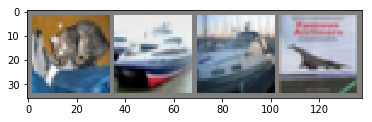

GroundTruth:    cat  ship  ship plane


In [136]:
dataiter = iter(testLoader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [137]:
outputs = net(Variable(images))

In [138]:
_, predicted = torch.max(outputs.data, 1) # 就是argmax
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    cat  ship  ship  ship


In [139]:
help(torch.max)

Help on built-in function max in module torch._C:

max(...)
    .. function:: max(input) -> float
    
    Returns the maximum value of all elements in the :attr:`input` Tensor.
    
    Args:
        input (Tensor): the input `Tensor`
    
    Example::
    
        >>> a = torch.randn(1, 3)
        >>> a
    
         0.4729 -0.2266 -0.2085
        [torch.FloatTensor of size 1x3]
    
        >>> torch.max(a)
        0.4729
    
    
    .. function:: max(input, dim, keepdim=False, out=None) -> (Tensor, LongTensor)
    
    Returns the maximum value of each row of the :attr:`input` Tensor in the given
    dimension :attr:`dim`. The second return value is the index location of each
    maximum value found (argmax).
    
    If :attr:`keepdim` is true, the output Tensors are of the same size
    as :attr:`input` except in the dimension :attr:`dim` where they are of size 1.
    Otherwise, :attr:`dim` is squeezed (see :func:`torch.squeeze`), resulting
    in the output Tensors having 1 f

In [145]:
correct = 0

total = 0
for data in testLoader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(output, 1) # pytorch的发明者绝对是个简洁主义，希望一个函数搞定一切，连个argmax都懒得造
    total += labels.size(0)
    correct += (predicted.data == labels).long().sum()
    
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 10 %


## 在GPU上训练
使用net.cuda()  inputs.cuda()  labels.cuda()

Well, Great, 到现在我们应该算是pytorch入门了吧？好，我们现在终于可以回到lr.ipynb了，完成我们之前未尽的事业。